In [50]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from glob import glob
import os

In [51]:
input_folder = 'test_images/'
output_folder = 'test_images_output/'

In [52]:
# The .prototxt file(s) which define the model architecture (i.e., the layers themselves)
# The .caffemodel file which contains the weights for the actual layers
# It uses deep learning, in particular a Single Shot Detector (SSD) with ResNet base network architecture.
neural_net = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

In [53]:
def face_detect(image):
    # load the input image and construct an input blob for the image
    # by resizing to a fixed 300x300 pixels and then normalizing it
    # print(image.shape)      # (146, 345, 3)
                              # (168, 300, 3)
                              # (190, 266, 3)
                              # (168, 300, 3)
    height = image.shape[0]
    width = image.shape[1]
    
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    # blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
    # The cv2.dnn.blobFromImage  function returns a blob  which is our input image after mean subtraction, normalizing, and channel swapping.
    # image : This is the input image we want to preprocess before passing it through our deep neural network for classification.
    # scalefactor : After we perform mean subtraction we can optionally scale our images by some factor. This value defaults to `1.0` (i.e., no scaling) but we can supply another value as well.
    # size : Here we supply the spatial size that the Convolutional Neural Network expects.
    # mean : These are our mean subtraction values.
    # swapRB : OpenCV assumes images are in BGR channel order; however, the `mean` value assumes we are using RGB order.
    # print(blob.shape)
    # (1, 3, 300, 300)
    # (1, 3, 300, 300)
    # (1, 3, 300, 300)
    # (1, 3, 300, 300)

    # pass the blob through the network and obtain the detections and predictions
    neural_net.setInput(blob)
    detections = neural_net.forward()
    # print(detections.shape)
    # (1, 1, 94, 7)
    # (1, 1, 93, 7)
    # (1, 1, 76, 7)
    # (1, 1, 84, 7)
    
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the prediction
        confidence = detections[0, 0, i, 2]
        # The face detector returns an array with the format:
        # [batchId, classId, confidence, left, top, right, bottom]
        # The “2” is the index of the “confidence” value in the array.

        # filter out weak detections by ensuring the `confidence` is greater than the minimum confidence
        if confidence > 0.80:
            # compute the (x, y)-coordinates of the bounding box for the object
            box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
            (X0, Y0, X1, Y1) = box.astype("int")

            # draw the bounding box of the face along with the associated probability
            text = "{:.2f}%".format(confidence * 100)
            y = Y0 - 10 if Y0 - 10 > 10 else Y0 + 10
            cv2.rectangle(image, (X0, Y0), (X1, Y1), (0, 0, 255), 2)
            cv2.putText(image, text, (X0, y), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 2)
            
    return image

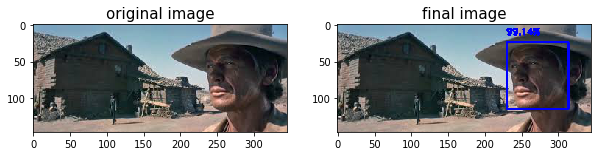

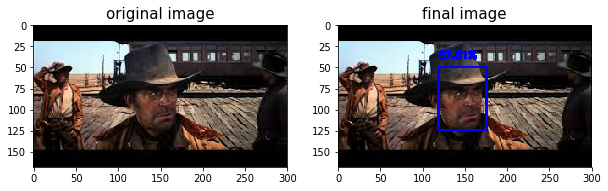

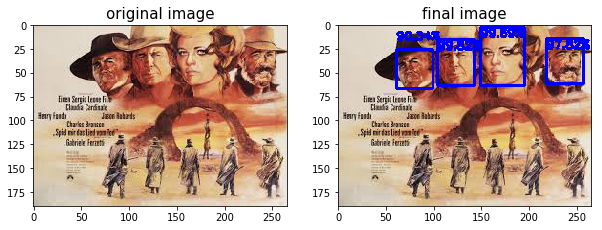

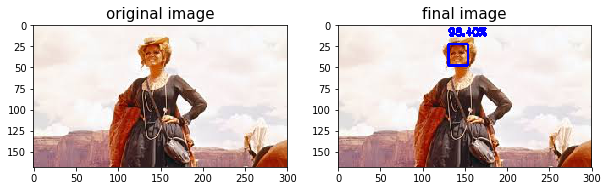

In [54]:
for image in glob(input_folder + '/*.jpg'):
    image_name = os.path.basename(image)
    img = mpimg.imread(image)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))
    ax1.imshow(img)
    ax1.set_title('original image', fontsize=15)
    final_image = face_detect(img)
    ax2.imshow(final_image)
    ax2.set_title('final image', fontsize=15)
    plt.imsave(output_folder + image_name , final_image)